In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


In [4]:
maha=df[df["State/UnionTerritory"]=="Maharashtra"]
maha.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,2020-03-09,Maharashtra,2,0,0,0,2
91,2020-03-10,Maharashtra,5,0,0,0,5
97,2020-03-11,Maharashtra,2,0,0,0,2
120,2020-03-12,Maharashtra,11,0,0,0,11
133,2020-03-13,Maharashtra,14,0,0,0,14


In [5]:
maha.columns=["date","state","confindian","conforeign","cured","deaths","confirmed"]
maha.head()

,date,state,confindian,conforeign,cured,deaths,confirmed
76,2020-03-09,Maharashtra,2,0,0,0,2
91,2020-03-10,Maharashtra,5,0,0,0,5
97,2020-03-11,Maharashtra,2,0,0,0,2
120,2020-03-12,Maharashtra,11,0,0,0,11
133,2020-03-13,Maharashtra,14,0,0,0,14


In [6]:
maha["TransConfirmed"]=np.log(maha["confirmed"])
maha

<ipython-input-6-611e9f9321e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha["TransConfirmed"]=np.log(maha["confirmed"])


,date,state,confindian,conforeign,cured,deaths,confirmed,TransConfirmed
76,2020-03-09,Maharashtra,2,0,0,0,2,0.693147
91,2020-03-10,Maharashtra,5,0,0,0,5,1.609438
97,2020-03-11,Maharashtra,2,0,0,0,2,0.693147
120,2020-03-12,Maharashtra,11,0,0,0,11,2.397895
133,2020-03-13,Maharashtra,14,0,0,0,14,2.639057
...,...,...,...,...,...,...,...,...
6020,2020-09-07,Maharashtra,-,-,644400,26604,907212,13.718131
6055,2020-09-08,Maharashtra,-,-,659322,27027,923641,13.736079
6090,2020-09-09,Maharashtra,-,-,672556,27407,943772,13.757640
6125,2020-09-10,Maharashtra,-,-,686462,27787,967349,13.782315


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

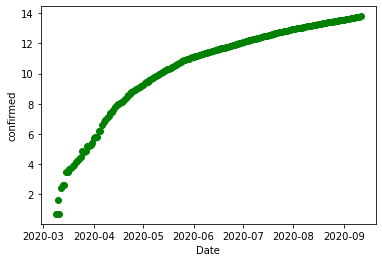

In [8]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(maha.date,maha.TransConfirmed,color="g")

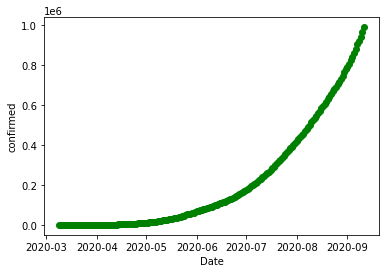

In [9]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(maha.date,maha.confirmed,color="g")

In [10]:
maha["RevConfirmed"]=np.exp(maha["TransConfirmed"])
maha

<ipython-input-10-13e8465fe90d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha["RevConfirmed"]=np.exp(maha["TransConfirmed"])


,date,state,confindian,conforeign,cured,deaths,confirmed,TransConfirmed,RevConfirmed
76,2020-03-09,Maharashtra,2,0,0,0,2,0.693147,2.0
91,2020-03-10,Maharashtra,5,0,0,0,5,1.609438,5.0
97,2020-03-11,Maharashtra,2,0,0,0,2,0.693147,2.0
120,2020-03-12,Maharashtra,11,0,0,0,11,2.397895,11.0
133,2020-03-13,Maharashtra,14,0,0,0,14,2.639057,14.0
...,...,...,...,...,...,...,...,...,...
6020,2020-09-07,Maharashtra,-,-,644400,26604,907212,13.718131,907212.0
6055,2020-09-08,Maharashtra,-,-,659322,27027,923641,13.736079,923641.0
6090,2020-09-09,Maharashtra,-,-,672556,27407,943772,13.757640,943772.0
6125,2020-09-10,Maharashtra,-,-,686462,27787,967349,13.782315,967349.0


In [11]:
import datetime as dt

In [12]:
maha["date"]=maha["date"].map(dt.datetime.toordinal)
maha.head()

<ipython-input-12-5ae5f3b61138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha["date"]=maha["date"].map(dt.datetime.toordinal)


,date,state,confindian,conforeign,cured,deaths,confirmed,TransConfirmed,RevConfirmed
76,737493,Maharashtra,2,0,0,0,2,0.693147,2.0
91,737494,Maharashtra,5,0,0,0,5,1.609438,5.0
97,737495,Maharashtra,2,0,0,0,2,0.693147,2.0
120,737496,Maharashtra,11,0,0,0,11,2.397895,11.0
133,737497,Maharashtra,14,0,0,0,14,2.639057,14.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
x=maha[["date"]]
y=maha[["TransConfirmed"]]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)

In [15]:
model1=LinearRegression()

In [16]:
model1.fit(xtrain1,ytrain1)

LinearRegression()

In [17]:
model1.score(xtrain1,ytrain1)

0.8524676145604984

In [18]:
ypred1=model1.predict(xtest1)

In [19]:
ypred1

array([[ 9.89488753],
       [12.04444771],
       [13.03655241],
       [ 7.96579506],
       [ 7.74532735],
       [ 5.37529945],
       [ 7.249275  ],
       [ 6.31228722],
       [11.32792765],
       [14.19400789],
       [11.10745994],
       [14.13889097],
       [10.72164145],
       [ 7.35950885],
       [ 9.50906903],
       [14.35935868],
       [ 7.57997656],
       [10.99722608],
       [14.8002941 ],
       [13.42237091],
       [12.98143548],
       [11.76886307],
       [10.2255891 ],
       [13.14678627],
       [ 9.8397706 ],
       [11.71374615],
       [10.44605681],
       [ 5.54065023],
       [ 6.09181951],
       [15.13099567],
       [ 7.02880728],
       [ 9.78465367],
       [ 7.13904114],
       [13.58772169],
       [12.54050006],
       [14.91052796],
       [12.70585085],
       [15.18611259]])

In [20]:
ytest1

,TransConfirmed
2577,11.156436
3982,12.381961
4620,12.877588
1400,9.058354
1272,8.768730
120,2.397895
977,7.896181
461,5.225747
3514,11.977496
5355,13.330153


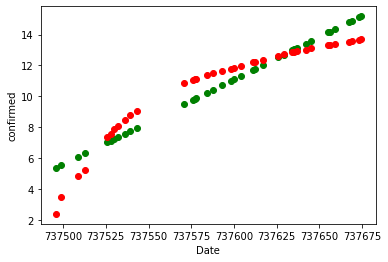

In [21]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(xtest1,ypred1,color="g")
plt.scatter(xtest1,ytest1,color="r")

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest1,ypred1)

1.1276317370165592

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model3=DecisionTreeRegressor()
model3.fit(xtrain1,ytrain1)

DecisionTreeRegressor()

In [25]:
model3.score(xtrain1,ytrain1)

1.0

In [26]:
ypred3=model3.predict(xtest1)

In [27]:
ypred3

array([11.18857941, 12.34843555, 12.900846  ,  8.9956609 ,  8.63976474,
        0.69314718,  7.75662333,  5.19295685, 11.93665607, 13.35131722,
       11.81890904, 13.29776941, 11.61497651,  7.97899637, 10.82438764,
       13.37434936,  8.34355384, 11.76138582, 13.52515157, 13.01743832,
       12.8368097 , 12.26428023, 11.32621027, 12.900846  , 11.03856034,
       12.17039365, 11.45148614,  2.63905733,  4.48863637, 13.64572292,
        7.21817684, 11.03856034,  7.47363711, 13.08108086, 12.61465622,
       13.56793214, 12.69781025, 13.71813144])

In [28]:
model3.score(xtrain1,ytrain1)

1.0

In [29]:
mean_squared_error(ytest1,ypred3)

0.10122842189950719

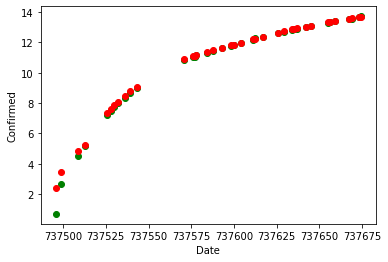

In [30]:
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.scatter(xtest1,ypred3,color="g")
plt.scatter(xtest1,ytest1,color="r")

In [31]:
from sklearn.svm import SVR

In [32]:
model2=SVR()
model2.fit(xtrain1,ytrain1)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [33]:
model2.score(xtrain1,ytrain1)

0.9877876266272643

In [34]:
ypred2=model2.predict(xtest1)
ypred2

array([11.05947323, 12.28746691, 12.83061294,  9.0818612 ,  8.67548946,
        3.37177875,  7.59708383,  5.22907196, 11.89556474, 13.42853544,
       11.77205209, 13.40523991, 11.55202093,  7.85445647, 10.80503124,
       13.49246529,  8.3399655 , 11.70968289, 13.60761004, 13.04445714,
       12.79996043, 12.13802563, 11.26140909, 12.89195506, 11.02469675,
       12.1079978 , 11.39182937,  3.60906464,  4.69971591, 13.62665027,
        7.05856997, 10.98948881,  7.33135892, 13.13412173, 12.55671162,
       13.62109523, 12.64742332, 13.62332303])

In [35]:
ytest1

,TransConfirmed
2577,11.156436
3982,12.381961
4620,12.877588
1400,9.058354
1272,8.768730
120,2.397895
977,7.896181
461,5.225747
3514,11.977496
5355,13.330153


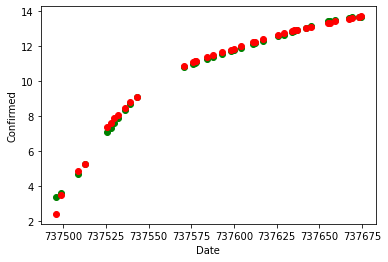

In [36]:
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.scatter(xtest1,ypred2,color="g")
plt.scatter(xtest1,ytest1,color="r")

In [37]:
rypred=np.exp(ypred2)
rypred

array([6.35430707e+04, 2.16959702e+05, 3.73477461e+05, 8.79431879e+03,
       5.85756614e+03, 2.91302965e+01, 1.99237731e+03, 1.86619533e+02,
       1.46614906e+05, 6.79107995e+05, 1.29579788e+05, 6.63470658e+05,
       1.03986975e+05, 2.57719395e+03, 4.92680583e+04, 7.23941086e+05,
       4.18794525e+03, 1.21744868e+05, 8.12287842e+05, 4.62525578e+05,
       3.62203116e+05, 1.86843309e+05, 7.77620725e+04, 3.97104624e+05,
       6.13712491e+04, 1.81316209e+05, 8.85948823e+04, 3.69314923e+01,
       1.09915942e+02, 8.27902163e+05, 1.16278116e+03, 5.92480895e+04,
       1.52745605e+03, 5.05913878e+05, 2.83994917e+05, 8.23315886e+05,
       3.10961168e+05, 8.25152115e+05])

In [38]:
np.ndim(rypred)

1

In [39]:
ry=np.exp(ytest1)
ryf=ry.values
ryf=ryf.reshape(-1,1)
ryf

array([[7.00130e+04],
       [2.38461e+05],
       [3.91440e+05],
       [8.59000e+03],
       [6.43000e+03],
       [1.10000e+01],
       [2.68700e+03],
       [1.86000e+02],
       [1.59133e+05],
       [6.15477e+05],
       [1.39010e+05],
       [6.04358e+05],
       [1.13445e+05],
       [3.20500e+03],
       [5.26670e+04],
       [6.57450e+05],
       [4.66900e+03],
       [1.32075e+05],
       [7.64281e+05],
       [4.57956e+05],
       [3.83723e+05],
       [2.06619e+05],
       [8.59750e+04],
       [4.11798e+05],
       [6.76550e+04],
       [2.00064e+05],
       [9.76480e+04],
       [3.20000e+01],
       [1.28000e+02],
       [8.63062e+05],
       [1.57400e+03],
       [6.51680e+04],
       [1.98500e+03],
       [4.90262e+05],
       [3.10455e+05],
       [7.92541e+05],
       [3.37607e+05],
       [8.83862e+05]])

In [40]:
np.ndim(ryf)

2

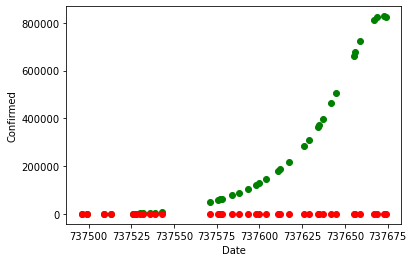

In [41]:
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.scatter(xtest1,rypred,color="g")
plt.scatter(xtest1,ytest1,color="r")

In [49]:
def find(x):
    a=model1.predict(np.array(x).reshape(-1,1))+model2.predict(np.array(x).reshape(-1,1))+model3.predict(np.array(x).reshape(-1,1))
    return a/3

In [51]:
ans1=find(737497)
ans1

array([[3.83832786]])

In [52]:
np.exp(ans1)

array([[46.44774231]])

In [54]:
ans=model1.predict(np.array(737497).reshape(-1,1))
ans

array([[5.43041638]])

In [55]:
np.exp(ans)

array([[228.24426174]])